In [1]:
import json
import os
import tensorflow as tf  # Ensure you have TensorFlow imported

class HistorySaver():
    def __init__(self, file_path):
        super().__init__()
        self.file_path = file_path
        self.history = []  # Initialize as a list
        self.last_epoch = 0  # Initialize last_epoch
        
        # Load existing history if the file exists
        if os.path.exists(self.file_path):
            with open(self.file_path, 'r') as file:
                data = json.load(file)
                self.history = data.get('history', [])
                self.last_epoch = data.get('last_epoch', 0)  # Load last completed epoch
# Usage
file_path = '90x90history.json'
history_saver = HistorySaver(file_path)


2024-10-28 07:49:32.127985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-28 07:49:32.128065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-28 07:49:32.135770: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 07:49:32.150050: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-28 07:49:33.435406: W tensorflow/compiler/tf2

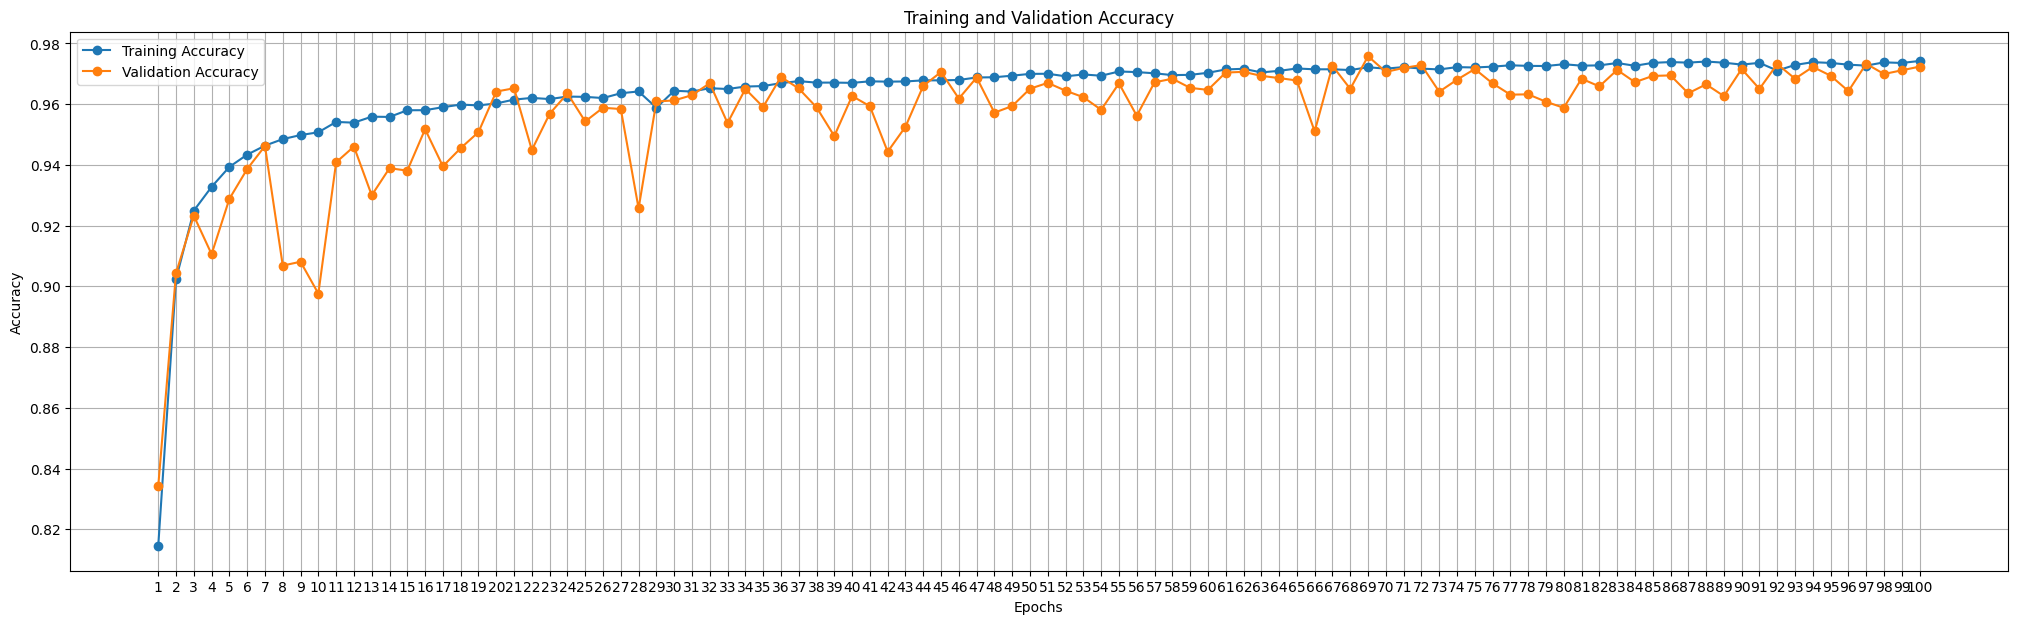

In [2]:
import matplotlib.pyplot as plt

# Assuming you have your history_saver instance
# Extract accuracy and validation accuracy from the history saved in history_saver
train_accuracies = [entry['accuracy'] for entry in history_saver.history]
val_accuracies = [entry['val_accuracy'] for entry in history_saver.history]

# Create a range of epochs based on the length of the accuracies
epochs_range = range(1, len(train_accuracies) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(25, 7))
plt.plot(epochs_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)  # Optional: Set x-ticks to be every epoch
plt.legend()
plt.grid(True)
plt.show()
# Note: 'Keras/90x90Best1.keras' has the best performance so far.Epochs of interest: 36, 46

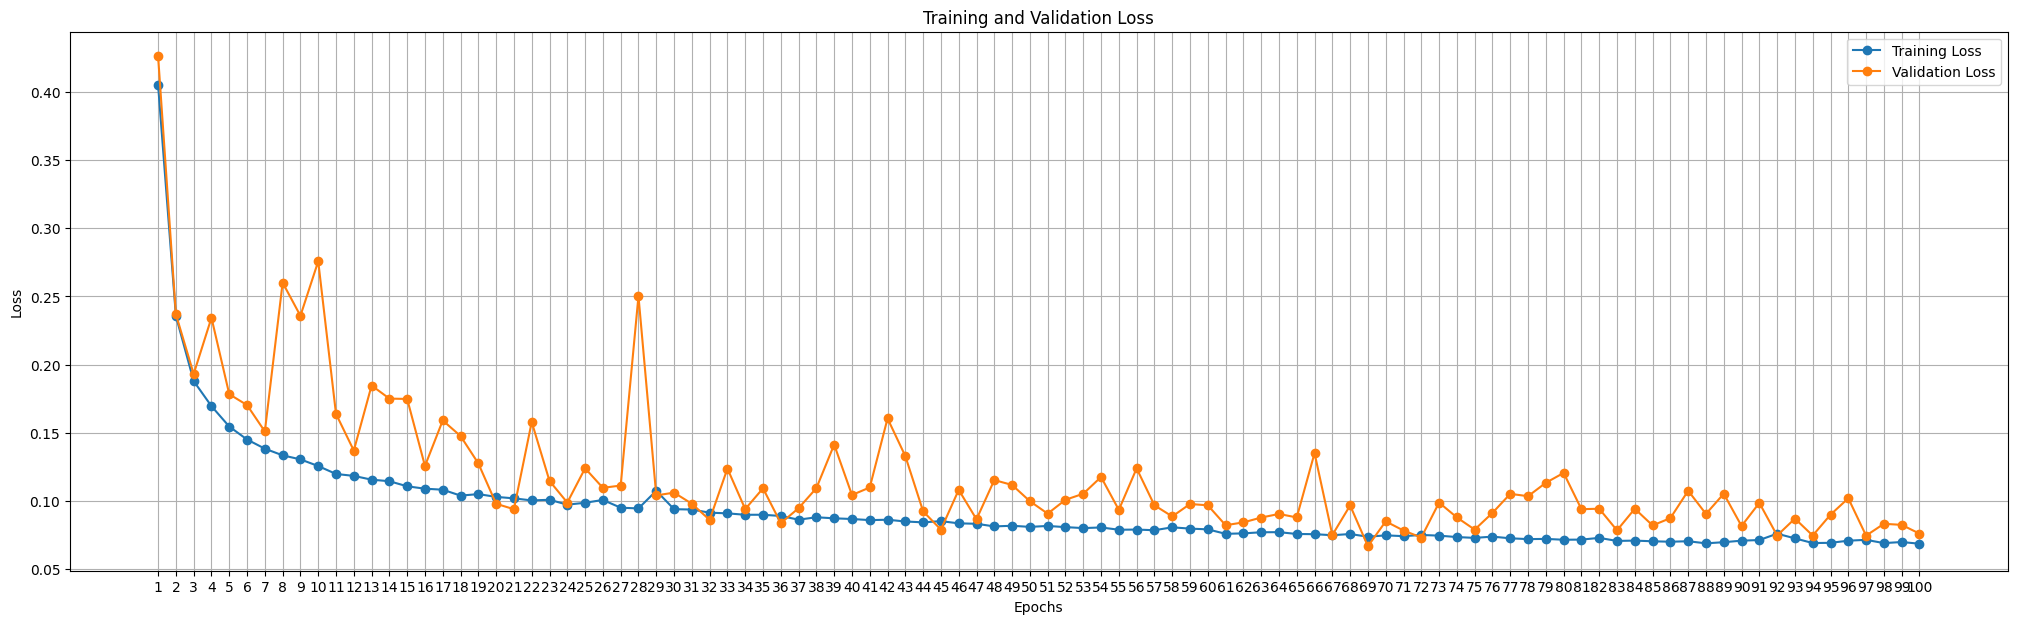

In [3]:
import matplotlib.pyplot as plt

# Assuming you have your history_saver instance
# Extract accuracy and validation accuracy from the history saved in history_saver
train_loss = [entry['loss'] for entry in history_saver.history]
val_loss = [entry['val_loss'] for entry in history_saver.history]

# Create a range of epochs based on the length of the accuracies
epochs_range = range(1, len(train_loss) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(25, 7))
plt.plot(epochs_range, train_loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs_range)  # Optional: Set x-ticks to be every epoch
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Find the highest validation accuracy and its corresponding epoch
highest_val_accuracy = max(val_accuracies)
highest_val_epoch = val_accuracies.index(highest_val_accuracy) + 1  # Adding 1 to match epoch count
# Print the highest validation accuracy and its epoch
print(f'Highest Validation Accuracy: {highest_val_accuracy:.4f} at Epoch {highest_val_epoch}')

Highest Validation Accuracy: 0.9758 at Epoch 69


In [7]:
# Specify the epoch you want to check (1-based index)
specific_epoch = 100  # Change this to the desired epoch number

# Get the accuracies for the specific epoch (adjust for 0-based index)
if 1 <= specific_epoch <= len(train_accuracies):
    train_accuracy_at_epoch = train_accuracies[specific_epoch - 1]
    val_accuracy_at_epoch = val_accuracies[specific_epoch - 1]
    print(f'Accuracy at Epoch {specific_epoch}:')
    print(f'Training Accuracy: {train_accuracy_at_epoch:.4f}')
    print(f'Validation Accuracy: {val_accuracy_at_epoch:.4f}')
else:
    print(f'Epoch {specific_epoch} is out of range.')

Accuracy at Epoch 100:
Training Accuracy: 0.9742
Validation Accuracy: 0.9724
